# Exercises A
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

In [26]:
import numpy as np

l = [1,2,3]
min(l)

1

### Exercise 1
Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the Vandermonde matrix $V$:
$$
V = \left(\begin{array}{ccccc}
1 & v_1 & v_1^2 & \dots & v_1^{n-1}\\
1 & v_2 & v_2^2 & \dots & v_2^{n-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & v_n & v_n^2 & \dots & v_n^{n-1}\\
\end{array} \right)
$$

In [2]:
# Enter your codes here...
import numpy as np


def vandermonde(vec):

    n = len(vec)
    mat = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            mat[i,j] = vec[i]**j

    return(mat)

vandermonde(np.array([1,2,3]))

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [3]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
np.empty(shape = (4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
# Ones and empty are identlical
(np.ones(shape = (4,4)) == np.empty(shape=(4,4))).all()

False

### Exercise 2

Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the mean and the sum of the vector.

1. Solve the task by using NumPy.
2. Solve the task without importing modules.

In [6]:
import numpy as np

def mean_sum(vec):

    sum = np.sum(vec)
    mean = np.mean(vec)

    return(mean, sum)

print(mean_sum(np.array([1,2,3])))


def mean_sum_hand(vec):

    n = len(vec)
    sum = 0

    for i in vec:
        sum += i

    mean = sum/n

    return(mean, sum)

print(mean_sum_hand(np.array([1,2,3])))


(2.0, 6)
(2.0, 6)


### Exercise 3

Use NumPy to check if the following vectors are linearly independent:

$$
v_1=
\left( \begin{array}{c} 0 \\ 1 \\ 2 \\ 1 \end{array} \right),
\ v_2=
\left( \begin{array}{c} 4 \\ 2 \\ 2 \\ 2 \end{array} \right),
\ v_3=
 \left( \begin{array}{c} 1 \\ 0 \\ 3 \\  0\end{array} \right),
\ v_4=
 \left( \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right).
$$

In [7]:
import numpy.linalg as nplin

# Solution 1
vec1 = np.array([0,1,2,1]).reshape((4,1))
vec2 = np.array([4,2,2,2]).reshape((4,1))
vec3 = np.array([1,0,3,0]).reshape((4,1))
vec4 = np.array([1,0,0,0]).reshape((4,1))

mat1 = np.concatenate((vec1, vec2, vec3, vec4), axis = 1)

print(f'Matrix 1:\n{mat1}\n')

# Solution 2

mat2 = np.array([[0,4,1,1],
                [1,2,0,0],
                [2,2,3,0],
                [1,2,0,0]])

print(f'Matrix 2:\n{mat2}\n')


def check_independence(mat):
    '''
    Linear independence is given is the matrix with vectors as columns has the determinant 0.
    '''
    if nplin.det(mat) == 0:
        print('The vectors are linearly independent!')
    else:
        print('The vecotrs are lienarl dependent!')

check_independence(mat1)

Matrix 1:
[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]

Matrix 2:
[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]

The vectors are linearly independent!


### Exercise 4

Create a function which sorts the vector $v=(v_1, \dots ,v_n)$ without using the built-in `array.sort()` function and visualize the result in a graph.

Bubble sort: [  1   2   2   3   5   7  63 346]
NumPy sort:  [  1   2   2   3   5   7  63 346]


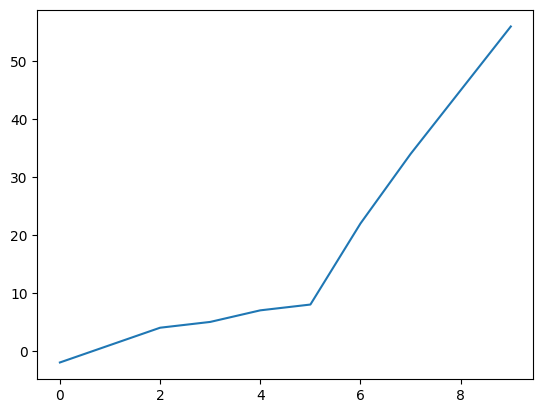

In [8]:
vec = np.array([1,2,5,3,346,7,2,63])

# Bubble sort
def bubble_sort(vec):

    n = len(vec)

    # Number of passes performed on the list#
    # In each pass, the largest element "bubbles up" to its correct position at the end of the list
    for i in range(n-1):

        # iterate over  elements that are still unsorted
        #n-1-i optimizes the algorithm, since the last i elements are already sorted
        for j in range(n-1):
            
            # Pairwise variable swap if following number is smaller
            if vec[j] > vec[j+1]:
                vec[j], vec[j+1] = vec[j+1], vec[j]
            else:
                pass
    return vec

print(f'Bubble sort: {bubble_sort(vec)}')
print(f'NumPy sort:  {np.sort(vec)}')


import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([4, 7, 22, 56, 8, -2, 34, 1, 5, 45])


def bubblesort(v):

    # Range object starting from the back
    for k in range(len(v)-1, 0, -1): #range(start, stop, step)
        for i in range(k):
            if v[i] > v[i+1]:
                v[i], v[i+1] = v[i+1], v[i]
    return v


# Lineplot of sorted values
plt.plot(bubblesort(v))

### Exercise 5

Determine the intersection of the straight line $g$ and the plane $E$:

$$g: \vec{x}=\left ( \begin{array}{c} 2 \\ 3 \\ 0 \end{array} \right) +t\left ( \begin{array}{c} 1 \\ -2 \\ 2 \end{array} \right), \quad t \in \mathbb{R},$$
$$E: \vec{x}= \left ( \begin{array}{c} 9 \\ 0 \\ 0 \end{array} \right) + r\left ( \begin{array}{c} -9 \\ 4.5 \\ 0 \end{array} \right) +s\left ( \begin{array}{c} -9 \\ 0 \\ 4.5 \end{array} \right), \quad r,s\in \mathbb{R}.$$

_Hint: You might want to refresh your knowledge of the parametric form at, for example,_ https://en.wikipedia.org/wiki/Line-plane_intersection.

In [9]:
import numpy.linalg as nplin

# defining matrices
g = np.array([[2, 1],
              [3, -2],
              [0, 2]])
e = np.array([[9, -9, -9],
              [0, 4.5, 0],
              [0, 0, 4.5]])

print(g[:, 0])
print(e[:, 0])

# form system of linear equations: Ax = b
b = g[:, 0] - e[:, 0]
a = np.column_stack([-g[:, 1], e[:, 1:]])

print(f'Matrix b:\n{b}\n')
print(f'Matrix a:\n{a}')

# solve system for x
x = nplin.solve(a, b)
x

[2 3 0]
[9. 0. 0.]
Matrix b:
[-7.  3.  0.]

Matrix a:
[[-1.  -9.  -9. ]
 [ 2.   4.5  0. ]
 [-2.   0.   4.5]]


array([1.        , 0.22222222, 0.44444444])

### Exercise 6: Sorting algorithms

Sorting algorithms are algorithms that put elements of a list in a certain order. Efficient sorting is important for optimizing the efficiency of complex algorithms. There are different sorting algorithms which differ in time complexity.

1. Implement a function which uses _Bubblesort_ to sort a randomly generated list (numbers) in numerical order.
2. Implement a function which uses _Quicksort_ achieve the same goal.

_Hint: Inform yourself about the two different sorting algorithms first, for example,_
https://en.wikipedia.org/wiki/Bubble_sort _and_ https://en.wikipedia.org/wiki/Quicksort.

In [15]:
import random

numbers = []
for i in range(100):
    numbers.append(random.randint(-10000, 10000))


def bubble_sort(lst):

    n = len(lst)

    for i in range(n-1):
        for j in range(n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
            else:
                pass
    return(lst)

bubble_sort(numbers)

[-9850,
 -9598,
 -9473,
 -9353,
 -9151,
 -8985,
 -8901,
 -8820,
 -8691,
 -8475,
 -8263,
 -8261,
 -8237,
 -8095,
 -7911,
 -7841,
 -7161,
 -6806,
 -5929,
 -5889,
 -5857,
 -5791,
 -5712,
 -5533,
 -5529,
 -5387,
 -4871,
 -4702,
 -4488,
 -4297,
 -4257,
 -4131,
 -3857,
 -3754,
 -3640,
 -3521,
 -3361,
 -3225,
 -3158,
 -2808,
 -2755,
 -2521,
 -2486,
 -2171,
 -1977,
 -1888,
 -1861,
 -1801,
 -1569,
 -1569,
 -1528,
 -1287,
 -1177,
 -872,
 -6,
 100,
 171,
 443,
 500,
 662,
 677,
 981,
 1068,
 1314,
 1317,
 1398,
 2097,
 2285,
 2691,
 2941,
 3220,
 3490,
 3942,
 4046,
 4079,
 4378,
 4502,
 4571,
 5091,
 5907,
 5918,
 5955,
 5967,
 6861,
 6978,
 7059,
 7145,
 7201,
 7293,
 7657,
 7744,
 7939,
 8120,
 8311,
 8401,
 8829,
 9563,
 9653,
 9854,
 9951]

### Exercise 7: Numerical differentiation

1. Create a function which estimates the derivative of the function $f$ at the position $x=3$. You can use the simple finite difference formula:

    $$
    f'(x)=\lim_{h \rightarrow 0} \dfrac{f(x+h) - f(x)}{h}
    $$

    The derivative function in Python should take the function to be derived, the position $x$ and the distance $h$ as arguments.


2. Create a function which estimates the gradient of a scalar function $g: \mathbb{R}^{n}\rightarrow \mathbb{R}$. The arguments of the gradient function should be the function $g$, the dimension $n$, the vector $v$ where the gradient shall be estimated and the distance $h$. Check your gradient function on the given function $g$ and vector $v$.

3. Create a function which returns an approximation of the Hessian matrix $h$ of the function $g$ at $v$:
  $$
  H_{g}(v) := \left( \dfrac{\partial^{2} g}{\partial v_{i} \partial v_{j}} (v) \right)_{i, j=1, \ldots, n}
  $$
  You can use the following identity:
  $$
  \dfrac{\partial}{\partial y}\left(\dfrac{\partial g}{\partial x}\right)(v) =\lim_{h \rightarrow 0}\dfrac{\dfrac{\partial g}{\partial x}(x, y+h, z)-\dfrac{\partial g}{\partial x}(x, y, z)}{h}\\
 =\lim_{h \rightarrow 0} \dfrac{\dfrac{g(x+h,y+h,z)-g(x,y+h,z)}{h}-\dfrac{g(x+h, y, z)-g(x, y, z)}{h}}{h}\\
 =\lim_{h \rightarrow 0}\dfrac{g(x+h, y+h, z)-g(x, y+h, z)-g(x+h, y, z)+g(x, y, z)}{h^{2}}
  $$

In [11]:
import numpy as np


def f(x):
    return x**2


def g(v):
    return np.sin(v[0]) * v[1] + np.exp(v[2])


v = np.array([2., 3., 1.])

### Exercise 8: Numerical integration

Create a function to approximate an integral of the function $f$ in the interval $(a, b)$. You can divide the area into $n$ equal width rectangles and add these up by using the formula:
$$
\int_{a}^{b}f(x) \approx \dfrac{b-a}{n}\left(f(x_{1})+f(x_{2})+...+f(x_{n})\right)
$$
Where $x_{i}$ is given by $x_{i}=\dfrac{(b-a)}{n} \cdot i+a$.
Check your integral approximation on the given function $f$ in the interval (1,4).

In [12]:
def f(x):
    return x**3 + 2 * x**2 + 1